Creating a non linear data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
np.random.seed(0)
df = np.random.exponential(size = 1000 , scale=2)
df = pd.DataFrame(df,columns= ['Values'] )
df.head()

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [4]:
df.shape

(1000, 1)

<Axes: ylabel='Count'>

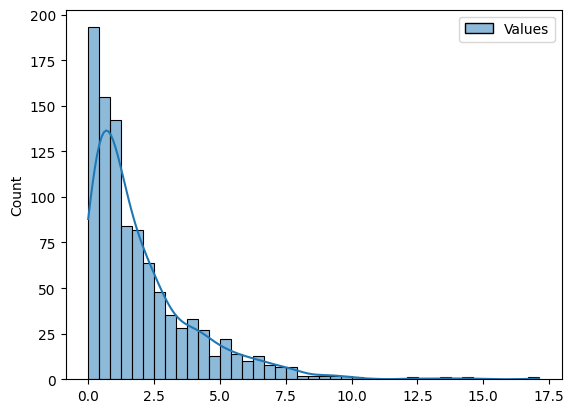

In [5]:
sns.histplot(df,kde=True)

1) Box-Cox 2) Yeo_johnson

In [17]:
from sklearn.preprocessing import PowerTransformer

box_cox = PowerTransformer(method='box-cox' , standardize=False)
yeo_johnson = PowerTransformer(method='yeo-johnson' , standardize=False)

df['box_cox'] = box_cox.fit_transform(df[['Values']])
df['yeo_johnson'] = yeo_johnson.fit_transform(df[['Values']])

In [19]:
df.head()

,Values,box_cox,yeo_johnson,Quantile
0,1.591749,0.491988,0.787485,0.162552
1,2.511862,1.031744,0.980233,0.587964
2,1.846446,0.661110,0.849553,0.286135
3,1.574402,0.479742,0.782945,0.157469
4,1.102097,0.098367,0.639848,-0.154930


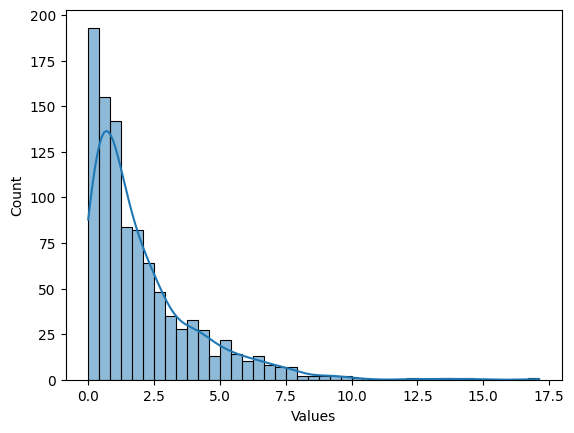

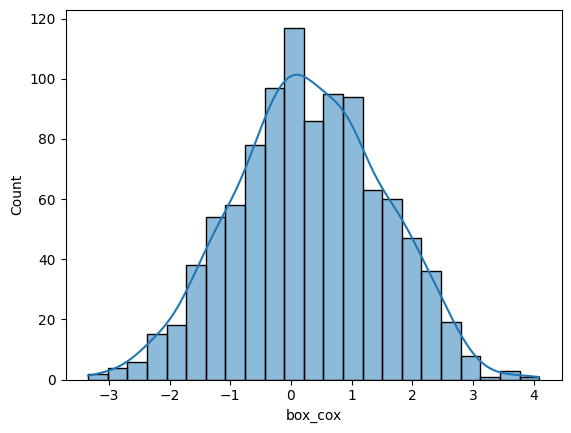

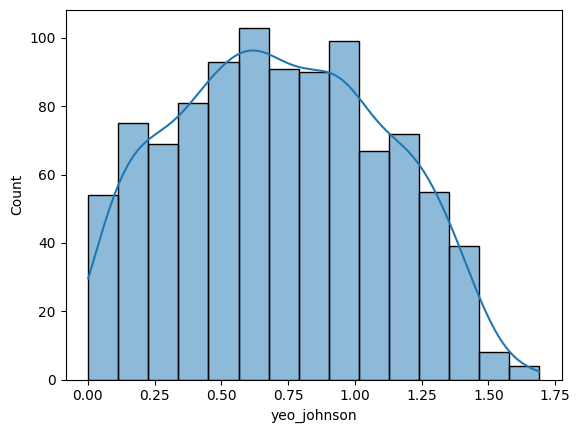

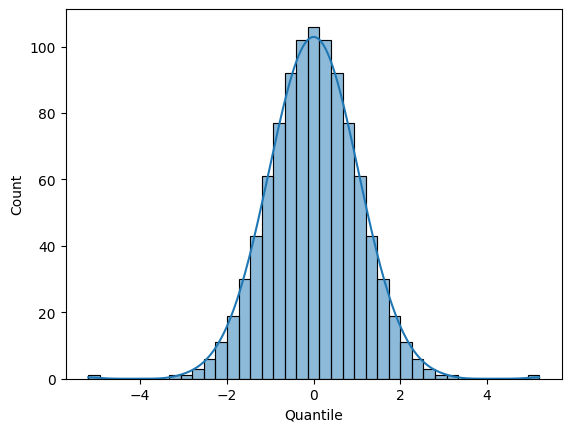

In [18]:
for cols in df.columns:
    sns.histplot(df[cols], kde = True)
    plt.show()


3) Quantile 

In [15]:
from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='normal')

df['Quantile'] = quantile.fit_transform(df[['Values']])

df.head()

,Values,box_cox,yeo_johnson,Quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


<Axes: xlabel='Quantile', ylabel='Count'>

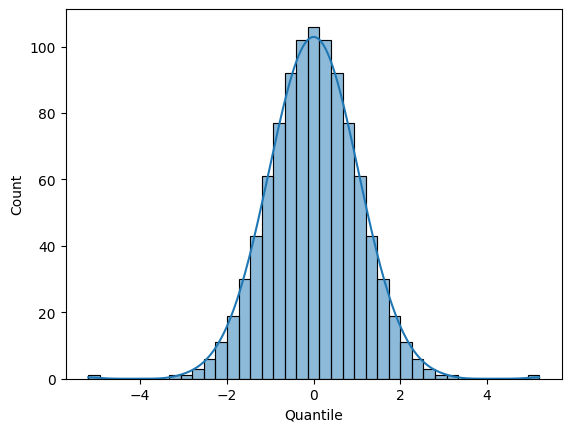

In [16]:
sns.histplot(df['Quantile'] , kde = True)

1)L1 ang L2 normalization 2) Log transformation

In [17]:
data4 =[
    [1,0,1],
    [1,0,0],
    [1,1,1],
]
df4 = pd.DataFrame(data4)
df4

,0,1,2
0,1,0,1
1,1,0,0
2,1,1,1


In [6]:
data3 ={
    'values' :[5,100,300,800,7000,30000,70000,100000]
}
df3 = pd.DataFrame(data3)
df3


,values
0,5
1,100
2,300
3,800
4,7000
5,30000
6,70000
7,100000


In [20]:
df3['log'] = np.log(df3['values'])
df3.head()

,values,log
0,5,1.609438
1,100,4.605170
2,300,5.703782
3,800,6.684612
4,7000,8.853665


In [19]:
from sklearn.preprocessing import  Normalizer
normalizer = Normalizer(norm ='l1')
normalizer2 = Normalizer(norm ='l2')

scale= normalizer2.fit_transform(data4)
scale2= normalizer2.fit_transform(data4)
scale2


array([[0.70710678, 0.        , 0.70710678],
       [1.        , 0.        , 0.        ],
       [0.57735027, 0.57735027, 0.57735027]])